In [13]:
import numpy as np 
import matplotlib.pyplot as plt


y = [70, 80, 82, 85, 90]
x1 = 5 * np.arange(1, 6) 
x2 = 7.5 * np.arange(13, 18)

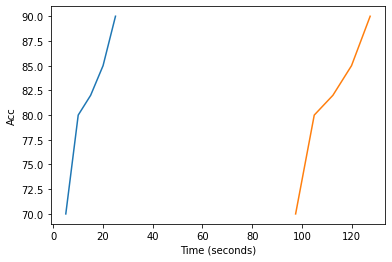

In [14]:
plt.plot(x1, y)
plt.plot(x2, y)
plt.xlabel('Time (seconds)')
plt.ylabel('Acc')
plt.show()

In [25]:
import numpy as np 
import matplotlib.pyplot as plt

m = np.arange(100)
epsilon2 = 0.0025

y_cheby = [1/(4*m_i*epsilon2) for m_i in m] 
y_hoff = [2*np.exp(-2*m_i*epsilon2) for m_i in m]

plt.plot(m, y_cheby, label='Chebyshev')
plt.plot(m, y_hoff, label='Hoeffding')
plt.xlabel('m')
plt.ylabel('Bound')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


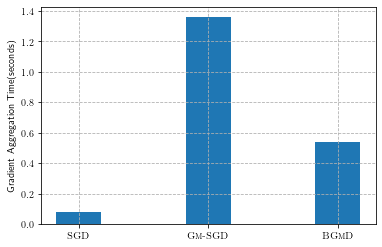

In [43]:
import matplotlib.pyplot as plt
from matplotlib import rc

grad = [0.010962245608365423, 0.008717414271775945, 0.008859736674686812]
agg = [0.0812835787678813, 1.3615191056178166, 0.5406124816272722]
ind = np.arange(3)
width = 0.35

p1 = plt.bar(ind, agg, width)
# p2 = plt.bar(ind, grad, width, bottom=agg)

rc('text', usetex=True)
plt.xticks(ind, (r"\textsc{SGD}", r"\textsc{Gm-SGD}", r"\textsc{BGmD}"))
plt.ylabel('Gradient Aggregation Time(seconds)')
plt.grid(True, which='both', linestyle='--')
#plt.legend((p1[0], p2[0]), ('Gradient Aggregation', 'Gradient Computation'))
plt.show()
